# ML Project: Clustering Virginia Housing with K-means
## Nanda, Siddharth (sn9dq); Wilson, Dale (dsw6ru)

In [1]:
# Import some common packages
import os
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd

from pandas.plotting import scatter_matrix
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

# to make this notebook's output stable across runs
np.random.seed(42)

In [2]:
# Read in data
housing = pd.read_csv('Zip_Zhvi_Summary_AllHomes.csv', encoding='latin-1')
housing = housing.loc[housing['State'] == 'VA'].dropna()
print('This dataset contains ' + str(len(housing)) + ' points')
housing.head()

This dataset contains 363 points


,Date,RegionID,RegionName,State,Metro,County,City,SizeRank,Zhvi,MoM,QoQ,YoY,5Year,10Year,PeakMonth,PeakQuarter,PeakZHVI,PctFallFromPeak,LastTimeAtCurrZHVI
67,2019-02-28,67732,23464,VA,Virginia Beach-Norfolk-Newport News,Virginia Beach City,Virginia Beach,67,257300,0.001947,0.009020,0.032090,0.023399,0.003607,2007-05,2007-Q2,265800,-0.031979,2005-12
92,2019-02-28,67730,23462,VA,Virginia Beach-Norfolk-Newport News,Virginia Beach City,Virginia Beach,92,199900,0.001002,0.008577,0.032541,0.021762,-0.001587,2007-08,2007-Q3,214000,-0.065888,2006-01
202,2019-02-28,67180,22191,VA,Washington-Arlington-Alexandria,Prince William County,Woodbridge,202,319000,0.000941,0.012056,0.044190,0.036696,0.028436,2006-02,2006-Q1,387800,-0.177411,2005-01
208,2019-02-28,67655,23320,VA,Virginia Beach-Norfolk-Newport News,Chesapeake City,Chesapeake,208,251000,0.002396,0.009654,0.032497,0.026064,0.002177,2006-07,2006-Q3,266800,-0.059220,2005-11
257,2019-02-28,67722,23454,VA,Virginia Beach-Norfolk-Newport News,Virginia Beach City,Virginia Beach,257,291800,-0.001369,0.001373,0.016017,0.023188,0.009300,2019-01,2019-Q1,292200,-0.001369,2019-01


In [3]:
# Number of entries, features, and dataset size
housing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 363 entries, 67 to 15483
Data columns (total 19 columns):
Date                  363 non-null object
RegionID              363 non-null int64
RegionName            363 non-null int64
State                 363 non-null object
Metro                 363 non-null object
County                363 non-null object
City                  363 non-null object
SizeRank              363 non-null int64
Zhvi                  363 non-null int64
MoM                   363 non-null float64
QoQ                   363 non-null float64
YoY                   363 non-null float64
5Year                 363 non-null float64
10Year                363 non-null float64
PeakMonth             363 non-null object
PeakQuarter           363 non-null object
PeakZHVI              363 non-null int64
PctFallFromPeak       363 non-null float64
LastTimeAtCurrZHVI    363 non-null object
dtypes: float64(6), int64(5), object(8)
memory usage: 56.7+ KB


In [4]:
# Basic statistics (number of entries, mean, std, percentiles, min/max)
housing.describe()

,RegionID,RegionName,SizeRank,Zhvi,MoM,QoQ,YoY,5Year,10Year,PeakZHVI,PctFallFromPeak
count,363.000000,363.000000,363.000000,3.630000e+02,363.000000,363.000000,363.000000,363.000000,363.000000,3.630000e+02,363.000000
mean,68410.545455,22976.482094,7553.245179,2.957061e+05,0.000671,0.007359,0.044021,0.033500,0.011548,3.176132e+05,-0.066648
std,17437.018237,1228.348551,4585.555435,1.738853e+05,0.003882,0.010047,0.029941,0.016546,0.011866,1.849074e+05,0.070830
min,66207.000000,20105.000000,67.000000,5.510000e+04,-0.017385,-0.051095,-0.053676,-0.031012,-0.036481,7.680000e+04,-0.407993
25%,67247.500000,22407.500000,3525.000000,1.799500e+05,-0.001552,0.002468,0.026449,0.023872,0.003637,1.898000e+05,-0.112544
50%,67567.000000,23150.000000,7268.000000,2.452000e+05,0.000457,0.007881,0.040106,0.031693,0.010295,2.636000e+05,-0.044338
75%,67889.500000,23886.500000,11552.000000,3.625500e+05,0.002829,0.013231,0.057710,0.041574,0.021338,4.121000e+05,-0.002688
max,399556.000000,24651.000000,15483.000000,1.072900e+06,0.015009,0.037883,0.165414,0.129726,0.046552,1.270600e+06,0.000000


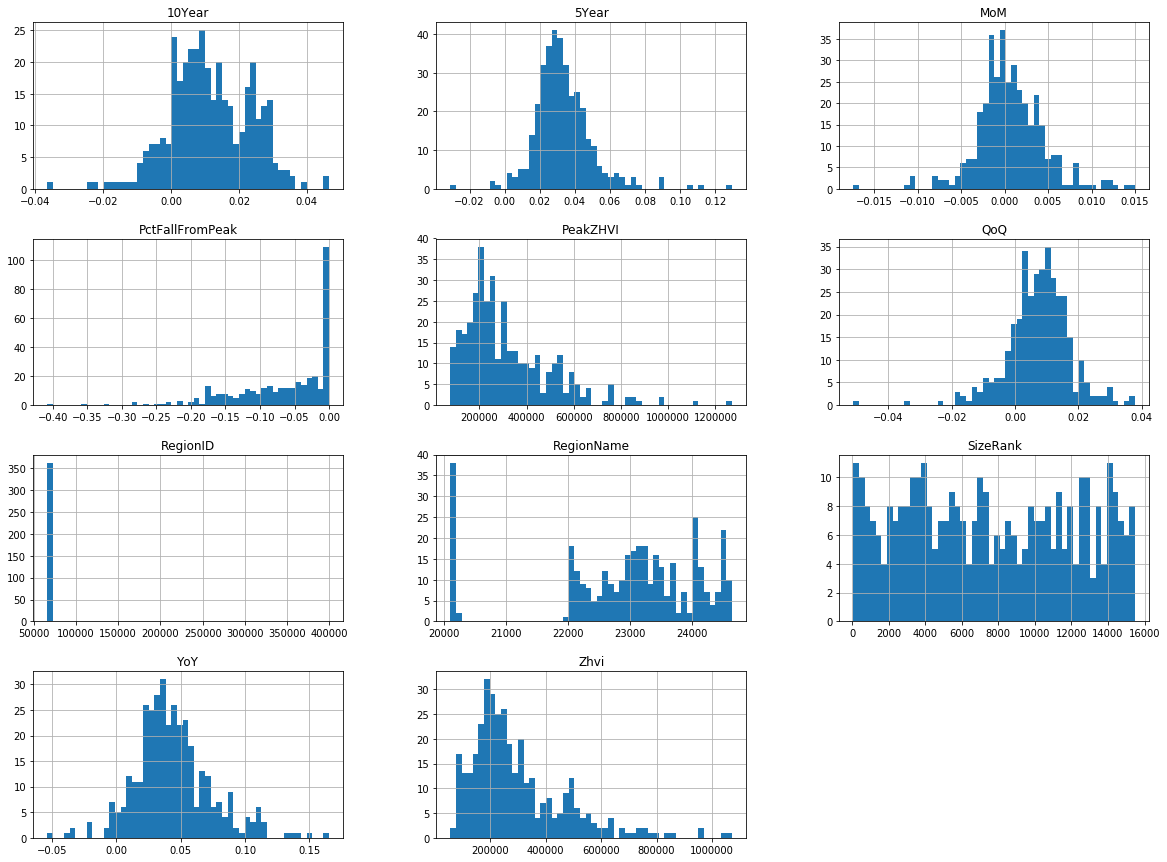

In [5]:
# Histograms to understand the shape of the data/derive possible relationships
housing.hist(bins = 50, figsize=(20,15))
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a251ecda0>,
      dtype=object)

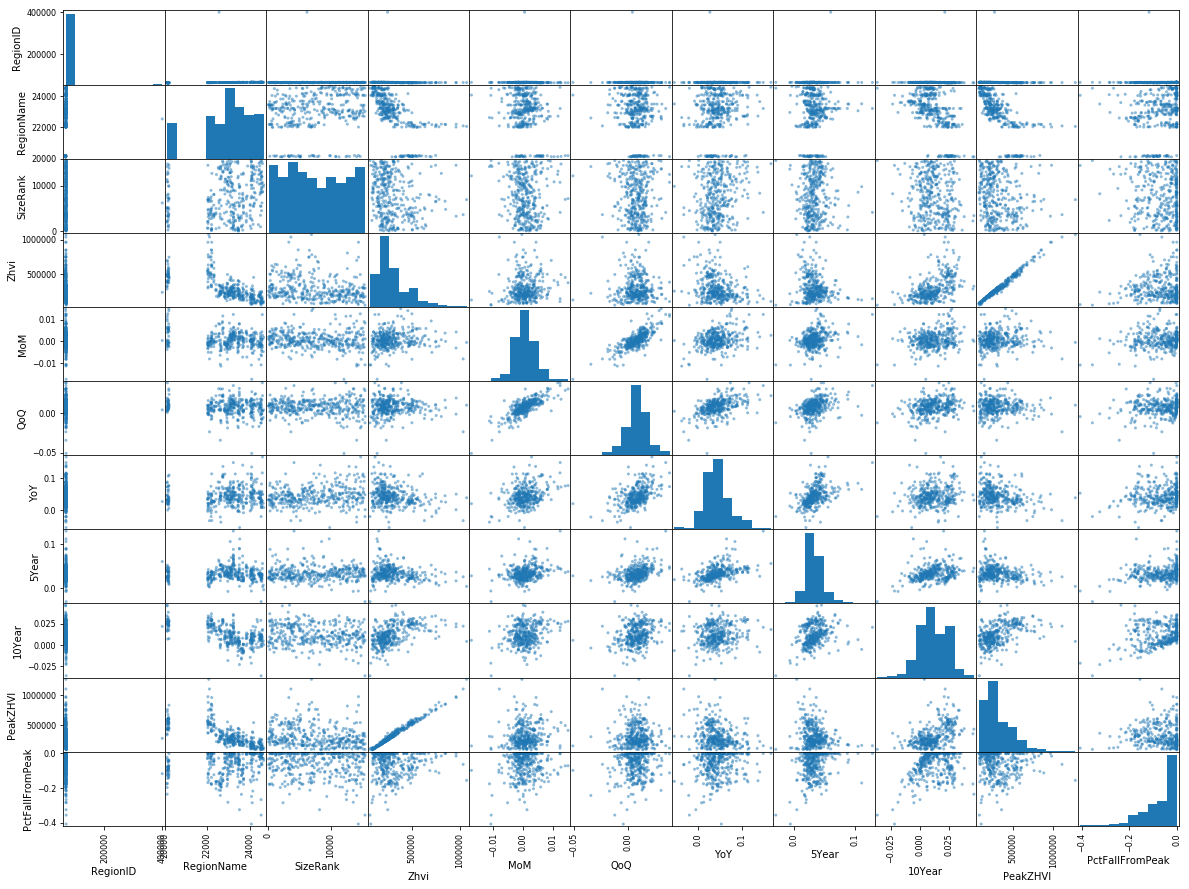

In [6]:
# Plot of correlations among features
scatter_matrix(housing[housing.columns], figsize=(20, 15))

In [7]:
# Pipelines for data transformation
num_pipeline = Pipeline([
    ('standard_scaler', StandardScaler())
])

full_pipeline = ColumnTransformer([
    ('num', num_pipeline, list(housing.select_dtypes(include=[np.number]))),
    ('cat', OneHotEncoder(), list(housing.select_dtypes(include=[np.object]).columns))
])

In [8]:
# Transform data
Housing = full_pipeline.fit_transform(housing)

/usr/local/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/anaconda3/lib/python3.6/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [12]:
# Cluster data and show results
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=42).fit(Housing)
result = kmeans.predict(Housing)
error = kmeans.inertia_
display(result)
display(error)

array([0, 0, 1, 0, 0, 1, 0, 1, 2, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 2, 1, 2,
       1, 0, 0, 1, 0, 1, 0, 2, 1, 2, 0, 2, 2, 0, 1, 0, 0, 1, 2, 2, 0, 1,
       2, 2, 1, 2, 2, 1, 2, 1, 1, 0, 0, 1, 0, 0, 2, 2, 2, 1, 2, 2, 0, 0,
       1, 1, 2, 0, 0, 0, 0, 1, 2, 2, 2, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 2,
       0, 2, 1, 1, 0, 1, 1, 1, 2, 1, 0, 1, 1, 1, 0, 0, 1, 2, 0, 0, 1, 1,
       2, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 2, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 0, 2, 2, 1, 2, 2, 2, 0, 0,
       0, 2, 0, 0, 0, 2, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       2, 0, 1, 1, 0, 1, 2, 2, 0, 1, 0, 1, 2, 2, 1, 2, 0, 0, 1, 0, 1, 0,
       1, 1, 2, 0, 2, 2, 0, 2, 2, 2, 0, 0, 0, 2, 0, 0, 2, 1, 0, 0, 2, 0,
       0, 0, 0, 2, 0, 0, 0, 2, 2, 0, 2, 1, 0, 1, 0, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 0, 2, 0, 2, 2, 0, 0, 1, 1, 2, 0, 0, 0, 2, 2, 2, 0, 1,
       0, 2, 0, 0, 0, 2, 2, 2, 0, 0, 2, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 2, 1, 0, 0, 0, 2, 0, 0, 1, 1, 0, 0, 0, 0,

4535.4290858344575

In [13]:
# Add cluster information to dataframe
housing['Cluster'] = result
housing.head()

,Date,RegionID,RegionName,State,Metro,County,City,SizeRank,Zhvi,MoM,QoQ,YoY,5Year,10Year,PeakMonth,PeakQuarter,PeakZHVI,PctFallFromPeak,LastTimeAtCurrZHVI,Cluster
67,2019-02-28,67732,23464,VA,Virginia Beach-Norfolk-Newport News,Virginia Beach City,Virginia Beach,67,257300,0.001947,0.009020,0.032090,0.023399,0.003607,2007-05,2007-Q2,265800,-0.031979,2005-12,0
92,2019-02-28,67730,23462,VA,Virginia Beach-Norfolk-Newport News,Virginia Beach City,Virginia Beach,92,199900,0.001002,0.008577,0.032541,0.021762,-0.001587,2007-08,2007-Q3,214000,-0.065888,2006-01,0
202,2019-02-28,67180,22191,VA,Washington-Arlington-Alexandria,Prince William County,Woodbridge,202,319000,0.000941,0.012056,0.044190,0.036696,0.028436,2006-02,2006-Q1,387800,-0.177411,2005-01,1
208,2019-02-28,67655,23320,VA,Virginia Beach-Norfolk-Newport News,Chesapeake City,Chesapeake,208,251000,0.002396,0.009654,0.032497,0.026064,0.002177,2006-07,2006-Q3,266800,-0.059220,2005-11,0
257,2019-02-28,67722,23454,VA,Virginia Beach-Norfolk-Newport News,Virginia Beach City,Virginia Beach,257,291800,-0.001369,0.001373,0.016017,0.023188,0.009300,2019-01,2019-Q1,292200,-0.001369,2019-01,0


Text(0.5, 1.0, 'K-Means Clusters over Change in ZHVI over 10 Years vs ZHVI')

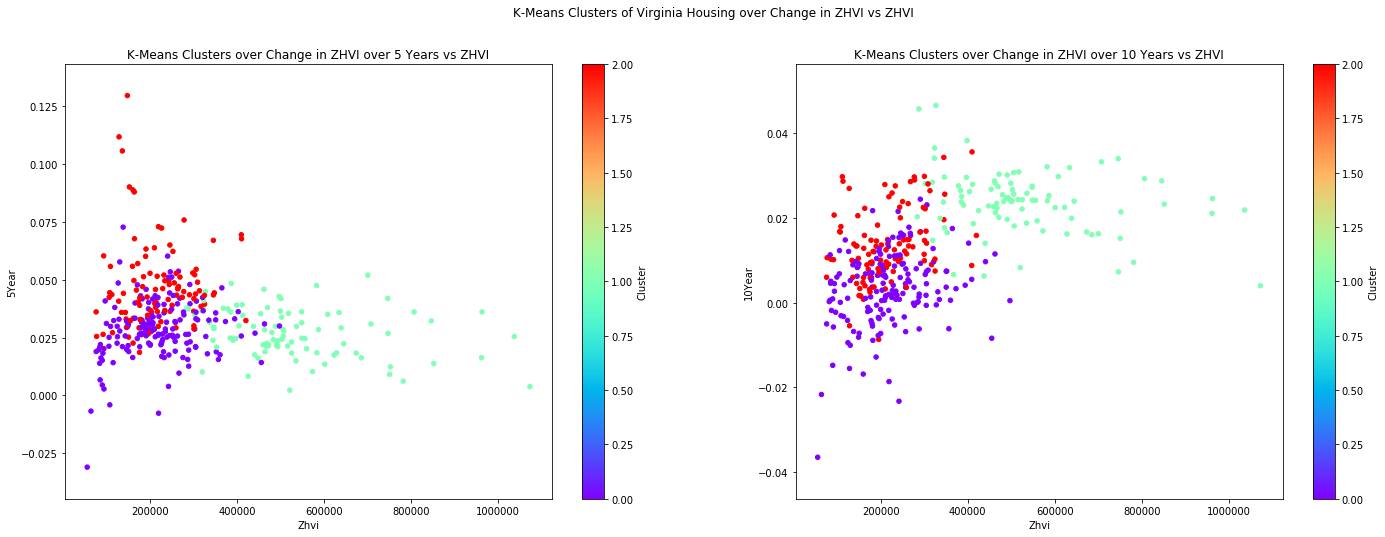

In [14]:
fig, axes = plt.subplots(1, 2, figsize=(24, 8))
fig.suptitle("K-Means Clusters of Virginia Housing over Change in ZHVI vs ZHVI")
ax1 = housing.plot(ax=axes[0], kind="scatter", x="Zhvi", y="5Year",
    c="Cluster", cmap=plt.get_cmap("rainbow"))
ax2 = housing.plot(ax=axes[1], kind="scatter", x="Zhvi", y="10Year",
    c="Cluster", cmap=plt.get_cmap("rainbow"))
ax1.set_title('K-Means Clusters over Change in ZHVI over 5 Years vs ZHVI')
ax2.set_title('K-Means Clusters over Change in ZHVI over 10 Years vs ZHVI')

Text(0.5, 1.0, 'K-Means Clusters over Year-over-Year Change in ZHVI vs ZHVI')

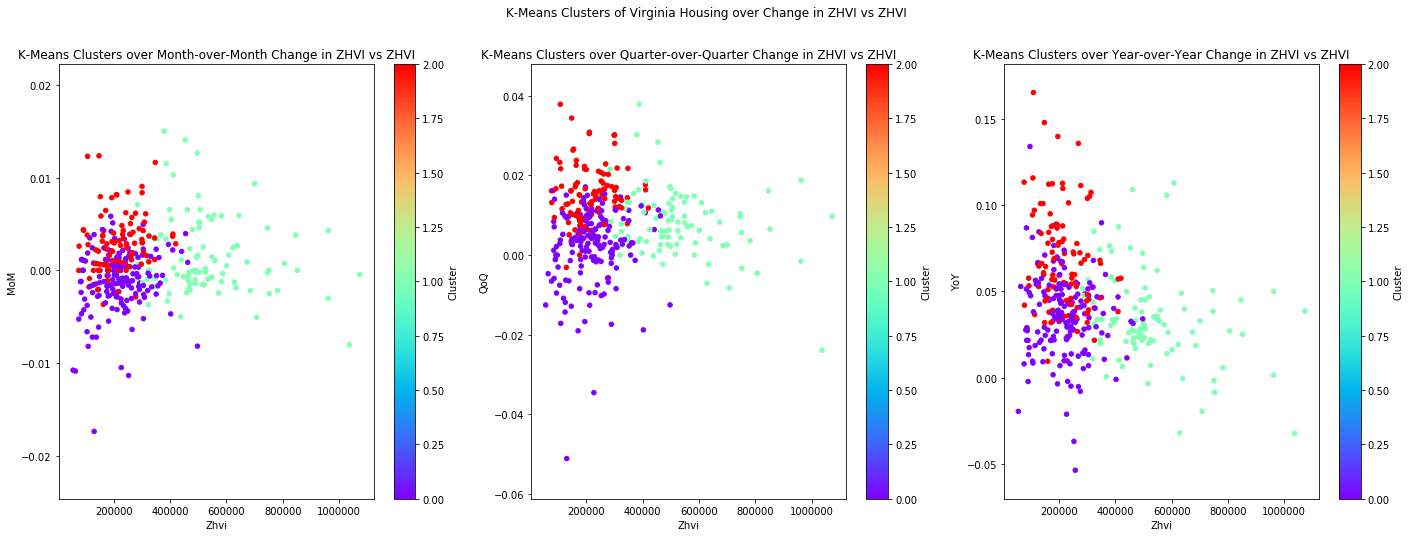

In [18]:
fig, axes = plt.subplots(1, 3, figsize=(24, 8))
fig.suptitle("K-Means Clusters of Virginia Housing over Change in ZHVI vs ZHVI")
ax1 = housing.plot(ax=axes[0], kind="scatter", x="Zhvi", y="MoM",
    c="Cluster", cmap=plt.get_cmap("rainbow"))
ax2 = housing.plot(ax=axes[1], kind="scatter", x="Zhvi", y="QoQ",
    c="Cluster", cmap=plt.get_cmap("rainbow"))
ax3 = housing.plot(ax=axes[2], kind="scatter", x="Zhvi", y="YoY",
    c="Cluster", cmap=plt.get_cmap("rainbow"))
ax1.set_title('K-Means Clusters over Month-over-Month Change in ZHVI vs ZHVI')
ax2.set_title('K-Means Clusters over Quarter-over-Quarter Change in ZHVI vs ZHVI')
ax3.set_title('K-Means Clusters over Year-over-Year Change in ZHVI vs ZHVI')

Text(0.5, 1.0, 'K-Means Clusters over Percentage Fall From Peak ZHVI vs ZHVI')

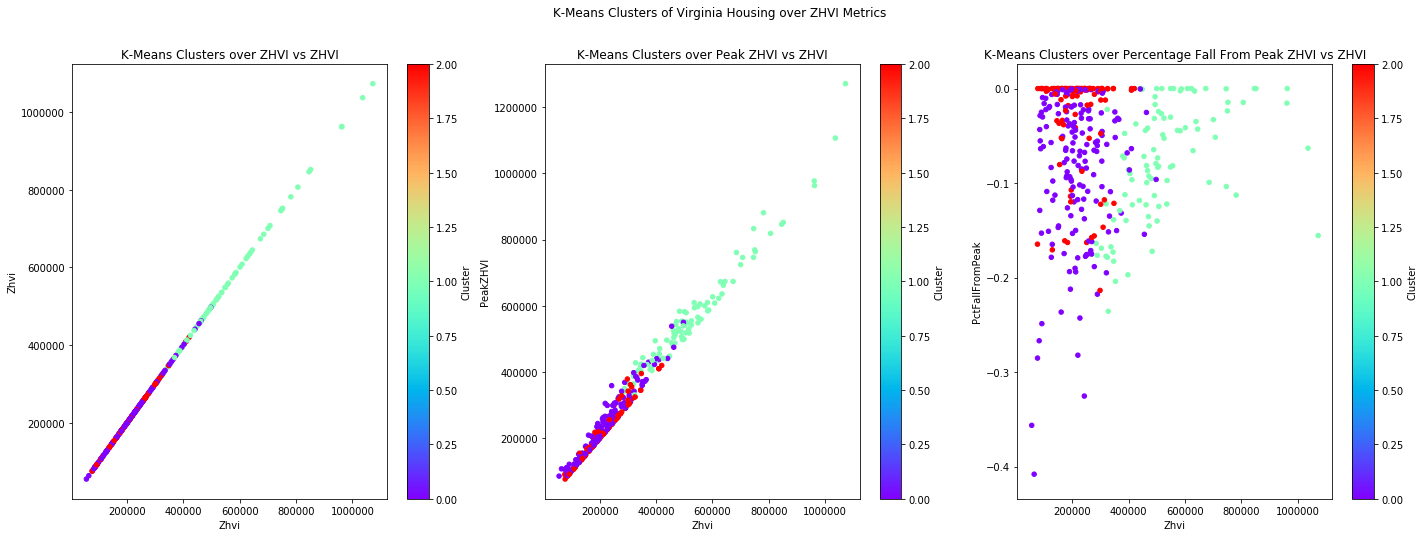

In [19]:
fig, axes = plt.subplots(1, 3, figsize=(24, 8))
fig.suptitle("K-Means Clusters of Virginia Housing over ZHVI Metrics")
ax1 = housing.plot(ax=axes[0], kind="scatter", x="Zhvi", y="Zhvi",
    c="Cluster", cmap=plt.get_cmap("rainbow"))
ax2 = housing.plot(ax=axes[1], kind="scatter", x="Zhvi", y="PeakZHVI",
    c="Cluster", cmap=plt.get_cmap("rainbow"))
ax3 = housing.plot(ax=axes[2], kind="scatter", x="Zhvi", y="PctFallFromPeak",
    c="Cluster", cmap=plt.get_cmap("rainbow"))
ax1.set_title('K-Means Clusters over ZHVI vs ZHVI')
ax2.set_title('K-Means Clusters over Peak ZHVI vs ZHVI')
ax3.set_title('K-Means Clusters over Percentage Fall From Peak ZHVI vs ZHVI')